In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']
plt.rcParams['font.sans-serif'] = ['Noto Serif CJK JP']

In [2]:
data_m = pd.read_excel('附件.xlsx', index_col=0, sheet_name='男胎检测数据')
data_f = pd.read_excel('附件.xlsx', index_col=0, sheet_name='女胎检测数据')

In [3]:
week_day = data_m['检测孕周'].str.lower().str.split('w')
# data_m.drop('检测孕周', axis=1, inplace=True)
data_m['检测孕周-周'] = week_day.apply(lambda x: int(x[0]))
data_m['检测孕周-天'] = week_day.apply(lambda x: int(0 if x[1] == '' else x[1]))
data_m['检测孕周'] = data_m['检测孕周-周'] + data_m['检测孕周-天'] / 7
data_m['孕妇BMI-分组'] = pd.cut(data_m['孕妇BMI'], bins=[20, 28, 32, 36, 40, np.inf], right=False).values.astype(str)
data_m['胎儿是否健康'] = data_m['胎儿是否健康'].map({'是': 1, '否': 0})
data_m['染色体的非整倍体-无异常'] = data_m['染色体的非整倍体'].isna().astype(int)
data_m['染色体的非整倍体-T13异常'] = data_m['染色体的非整倍体'].apply(lambda x: pd.notna(x) and 'T13' in x).astype(int)
data_m['染色体的非整倍体-T18异常'] = data_m['染色体的非整倍体'].apply(lambda x: pd.notna(x) and 'T18' in x).astype(int)
data_m['染色体的非整倍体-T21异常'] = data_m['染色体的非整倍体'].apply(lambda x: pd.notna(x) and 'T21' in x).astype(int)
data_m.drop(columns=['染色体的非整倍体'], inplace=True)
data_m = data_m.rename(columns={'唯一比对的读段数  ': '唯一比对的读段数'})
data_m['达标'] = (data_m['Y染色体浓度'] > .04).astype(int)
data_m

,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,孕妇BMI,...,生产次数,胎儿是否健康,检测孕周-周,检测孕周-天,孕妇BMI-分组,染色体的非整倍体-无异常,染色体的非整倍体-T13异常,染色体的非整倍体-T18异常,染色体的非整倍体-T21异常,达标
序号,,,,,,,,,,,,,,,,,,,,,
1,A001,31,160.0,72.00,2023-02-01 00:00:00,自然受孕,20230429,1,11.857143,28.125000,...,0,1,11,6,"[28.0, 32.0)",1,0,0,0,0
2,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230531,2,15.857143,28.515625,...,0,1,15,6,"[28.0, 32.0)",1,0,0,0,0
3,A001,31,160.0,73.00,2023-02-01 00:00:00,自然受孕,20230625,3,20.142857,28.515625,...,0,1,20,1,"[28.0, 32.0)",1,0,0,0,1
4,A001,31,160.0,74.00,2023-02-01 00:00:00,自然受孕,20230716,4,22.857143,28.906250,...,0,1,22,6,"[28.0, 32.0)",1,0,0,0,1
5,A002,32,149.0,74.00,2023-11-09 00:00:00,自然受孕,20240219,1,13.857143,33.331832,...,1,0,13,6,"[32.0, 36.0)",1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,A266,30,159.0,83.35,2022-12-29,自然受孕,2023-05-02 00:00:00,4,17.714286,32.969881,...,0,1,17,5,"[32.0, 36.0)",0,0,1,0,1
1079,A267,28,155.0,73.76,2023-02-25,自然受孕,2023-05-17 00:00:00,1,11.571429,30.703133,...,0,1,11,4,"[28.0, 32.0)",0,0,0,1,1
1080,A267,28,155.0,74.06,2023-02-25,自然受孕,2023-05-24 00:00:00,2,12.571429,30.825814,...,0,1,12,4,"[28.0, 32.0)",1,0,0,0,1


In [4]:
week_day = data_f['检测孕周'].str.lower().str.split('w')
# data_f.drop('检测孕周', axis=1, inplace=True)
data_f['检测孕周-周'] = week_day.apply(lambda x: int(x[0]))
data_f['检测孕周-天'] = week_day.apply(lambda x: int(0 if x[1] == '' else x[1]))
data_f['检测孕周'] = data_f['检测孕周-周'] + data_f['检测孕周-天'] / 7
data_f['孕妇BMI-分组'] = pd.cut(data_f['孕妇BMI'], bins=[20, 28, 32, 36, 40, np.inf], right=False).values.astype(str)
data_f['胎儿是否健康'] = data_f['胎儿是否健康'].map({'是': 1, '否': 0})
data_f['染色体的非整倍体-无异常'] = data_f['染色体的非整倍体'].isna().astype(int)
data_f['染色体的非整倍体-T13异常'] = data_f['染色体的非整倍体'].apply(lambda x: pd.notna(x) and 'T13' in x).astype(int)
data_f['染色体的非整倍体-T18异常'] = data_f['染色体的非整倍体'].apply(lambda x: pd.notna(x) and 'T18' in x).astype(int)
data_f['染色体的非整倍体-T21异常'] = data_f['染色体的非整倍体'].apply(lambda x: pd.notna(x) and 'T21' in x).astype(int)
data_f.drop(columns=['染色体的非整倍体'], inplace=True)
data_f

,孕妇代码,年龄,身高,体重,末次月经,IVF妊娠,检测日期,检测抽血次数,检测孕周,孕妇BMI,...,怀孕次数,生产次数,胎儿是否健康,检测孕周-周,检测孕周-天,孕妇BMI-分组,染色体的非整倍体-无异常,染色体的非整倍体-T13异常,染色体的非整倍体-T18异常,染色体的非整倍体-T21异常
序号,,,,,,,,,,,,,,,,,,,,,
1,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231119,1,13.714286,31.245237,...,1,0,1,13,5,"[28.0, 32.0)",1,0,0,0
2,B001,32,162.0,82.0,2023-08-06 00:00:00,自然受孕,20231208,2,17.142857,31.245237,...,1,0,1,17,1,"[28.0, 32.0)",1,0,0,0
3,B001,32,162.0,85.0,2023-08-06 00:00:00,自然受孕,20240101,3,19.857143,32.388355,...,1,0,1,19,6,"[32.0, 36.0)",1,0,0,0
4,B001,32,162.0,86.0,2023-08-06 00:00:00,自然受孕,20240123,4,23.000000,32.769395,...,1,0,1,23,0,"[32.0, 36.0)",1,0,0,0
5,B002,33,165.0,96.0,2023-02-15 00:00:00,自然受孕,20230519,1,12.714286,35.261708,...,1,0,1,12,5,"[32.0, 36.0)",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,B146,34,164.0,90.0,2022-12-31 00:00:00,自然受孕,20230615,4,23.142857,33.462225,...,≥3,1,1,23,1,"[32.0, 36.0)",0,0,1,0
602,B147,32,166.0,86.0,2023-01-08 00:00:00,自然受孕,20230423,1,15.000000,31.209174,...,≥3,1,1,15,0,"[28.0, 32.0)",1,0,0,0
603,B147,32,166.0,84.0,2023-01-08 00:00:00,自然受孕,20230513,2,15.571429,30.483379,...,≥3,1,1,15,4,"[28.0, 32.0)",1,0,0,0


-------------------------------------------------- 检测孕周 --------------------------------------------------


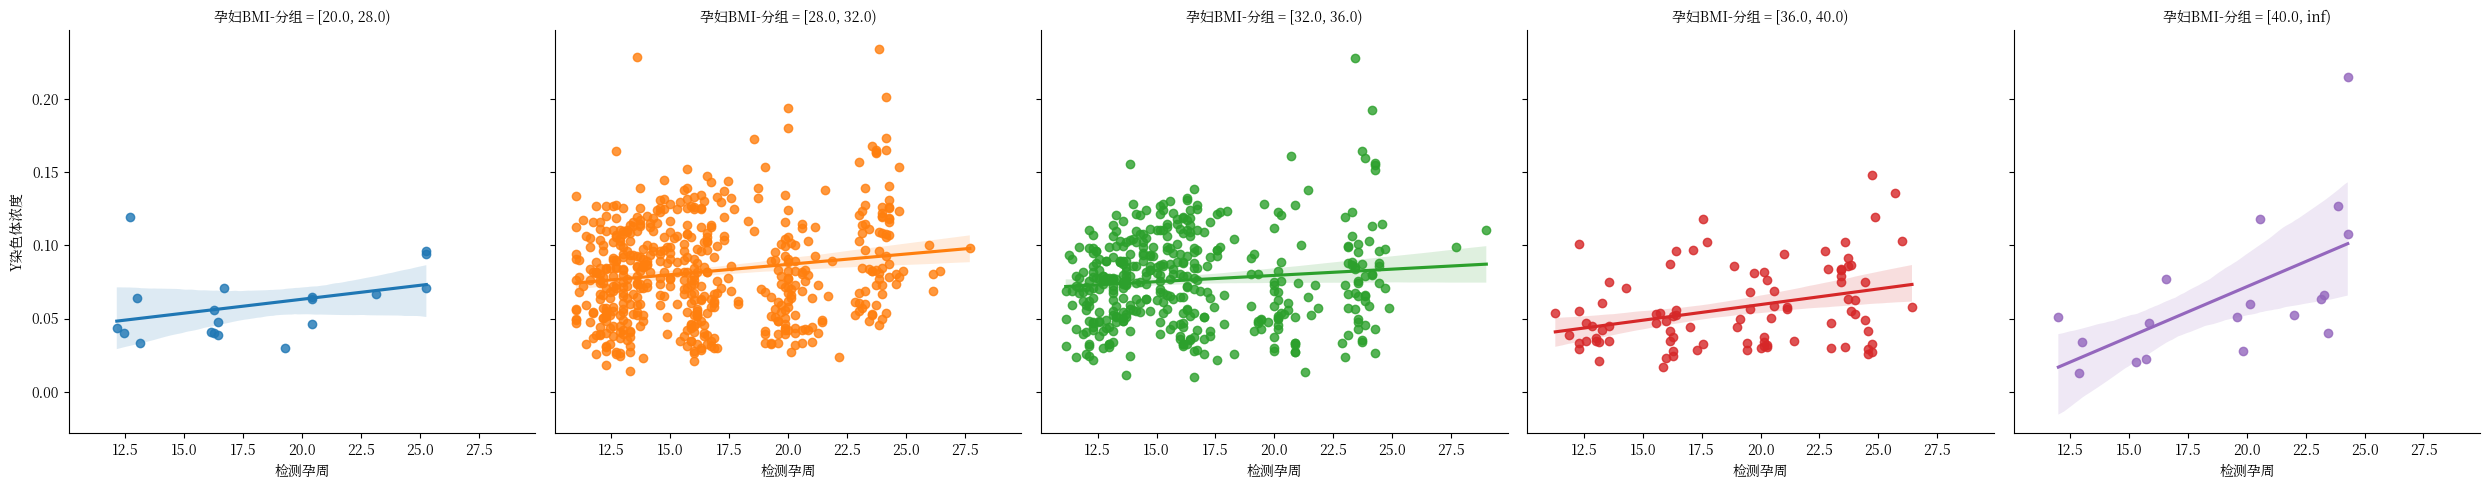

-------------------------------------------------- 检测孕周-周 --------------------------------------------------


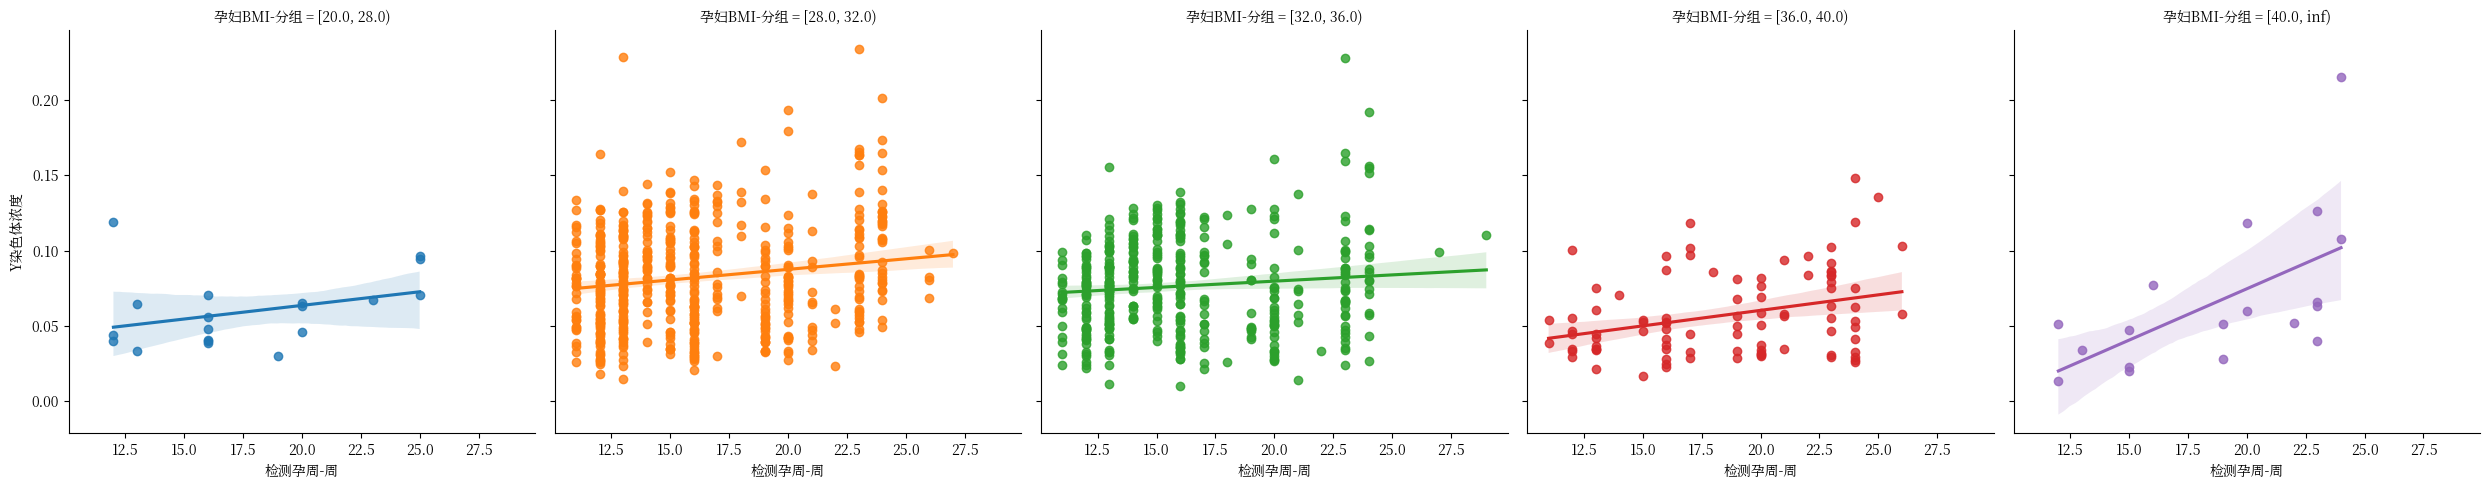

In [5]:
y = 'Y染色体浓度'
group = '孕妇BMI-分组'
columns = [
    # '生产次数',
    # '检测抽血次数',
    # '染色体的非整倍体-无异常',
    # '13号染色体的GC含量', '13号染色体的Z值', '染色体的非整倍体-T13异常',
    # '18号染色体的GC含量', '18号染色体的Z值', '染色体的非整倍体-T18异常',
    # '21号染色体的GC含量', '21号染色体的Z值', '染色体的非整倍体-T21异常',
    # 'GC含量', 'X染色体浓度', 'X染色体的Z值', 'Y染色体的Z值',
    # '体重', '身高', '年龄', '孕妇BMI',
    # '胎儿是否健康',
    # '原始读段数', '唯一比对的读段数', 
    # '在参考基因组上比对的比例', '被过滤掉读段数的比例', '重复读段的比例',
    '检测孕周', '检测孕周-周',
]
for x in columns:
    print('-'*50, x, '-'*50)
    sns.lmplot(
        data=data_m.sort_values(by=group),
        x=x, y=y,
        hue=group, col=group,
        # palette='coolwarm', aspect=1.2,
    )
    plt.show()

In [6]:
import statsmodels.api as sm

columns = [
    '生产次数',
    '检测抽血次数',
    '染色体的非整倍体-无异常',
    '13号染色体的GC含量', '13号染色体的Z值', '染色体的非整倍体-T13异常',
    '18号染色体的GC含量', '18号染色体的Z值', '染色体的非整倍体-T18异常',
    '21号染色体的GC含量', '21号染色体的Z值', '染色体的非整倍体-T21异常',
    'GC含量', 'X染色体浓度', 'X染色体的Z值', 'Y染色体的Z值',
    '体重', '身高', '年龄', '孕妇BMI',
    '胎儿是否健康',
    '原始读段数', '唯一比对的读段数', 
    '在参考基因组上比对的比例', '被过滤掉读段数的比例', '重复读段的比例',
    '检测孕周', #'检测孕周-周',
]
# X = data_m[['检测孕周-周', '孕妇BMI']]
X = data_m[columns]
idx = np.where((X.corr() > 0.9) & (X.corr() < 1))[0]
print(X.columns[idx])
columns = [i for i in columns if i not in X.columns[idx]]

Index([], dtype='object')


In [7]:
# X = data_m[['检测孕周-周', '孕妇BMI']]
X = data_m[columns]
y = data_m['Y染色体浓度']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()  # 最小二乘法
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Y染色体浓度   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     36.67
Date:                   日, 07 9月 2025   Prob (F-statistic):          2.16e-131
Time:                        16:39:32   Log-Likelihood:                 2497.7
No. Observations:                1082   AIC:                            -4939.
Df Residuals:                    1054   BIC:                            -4800.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3406      0.275     -1.

In [8]:
model.params

const            -3.405569e-01
生产次数              3.801958e-04
检测抽血次数            1.620538e-02
染色体的非整倍体-无异常      1.023734e-02
13号染色体的GC含量      -3.168010e-01
13号染色体的Z值         4.366316e-04
染色体的非整倍体-T13异常    3.168520e-03
18号染色体的GC含量       3.695014e-01
18号染色体的Z值        -2.208808e-03
染色体的非整倍体-T18异常    8.491180e-03
21号染色体的GC含量       1.274541e-01
21号染色体的Z值        -1.359002e-04
染色体的非整倍体-T21异常    4.030129e-03
GC含量              4.556014e-01
X染色体浓度            4.106846e-01
X染色体的Z值           1.621932e-03
Y染色体的Z值           4.242170e-03
体重               -1.863418e-03
身高                1.639357e-03
年龄               -7.065111e-04
孕妇BMI             3.240868e-03
胎儿是否健康            7.716582e-03
原始读段数            -4.252892e-09
唯一比对的读段数          1.055961e-09
在参考基因组上比对的比例     -9.843997e-02
被过滤掉读段数的比例        7.255262e-01
重复读段的比例           5.802354e-01
检测孕周             -3.174294e-03
dtype: float64